In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv("waterQuality1.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [ ]:
# Verificando células vazias ou NaN
print(df.isna().sum())

# Excluindo células vazias ou NaN
df = df.dropna()

# Criando um novo dataframe
data = df.copy()


aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64


In [ ]:
# Excluindo as colunas desnecessárias
data = data.drop(["ammonia" ,"aluminium", "arsenic", "barium", "cadmium", "chloramine", "chromium", "copper", "flouride", "lead", "mercury", "radium", "selenium", "silver", "uranium"], axis=1)
data.dropna()


,bacteria,viruses,nitrates,nitrites,perchlorate,is_safe
0,0.20,0.000,16.08,1.13,37.75,1
1,0.65,0.650,2.01,1.93,32.26,1
2,0.05,0.003,14.16,1.11,50.28,0
3,0.71,0.710,1.41,1.29,9.12,1
4,0.13,0.001,6.74,1.11,16.90,1
...,...,...,...,...,...,...
7994,0.00,0.000,14.29,1.00,3.57,1
7995,0.00,0.000,10.27,1.00,1.48,1
7996,0.00,0.000,15.92,1.00,1.35,1
7997,0.00,0.000,0.00,0.00,0.00,1


In [ ]:
# Mostrando a distribuição de classes

print(data['bacteria'].value_counts())
print(data['viruses'].value_counts())
print(data['nitrates'].value_counts())
print(data['nitrites'].value_counts())
print(data['perchlorate'].value_counts())


0.00    2795
0.13      84
0.75      84
0.89      83
0.74      80
        ... 
0.90      26
0.12      25
0.47      21
0.81      21
0.88      21
Name: bacteria, Length: 101, dtype: int64
0.000    1306
0.001     453
0.008     420
0.002     408
0.005     383
         ... 
0.860      42
0.710      41
0.900      34
0.810      25
0.880      25
Name: viruses, Length: 61, dtype: int64
8.32     20
10.90    19
14.66    18
4.94     17
11.36    16
         ..
5.34      1
8.77      1
5.31      1
19.03     1
0.00      1
Name: nitrates, Length: 1803, dtype: int64
1.20    89
1.27    78
1.36    78
1.37    74
1.95    74
        ..
2.83     1
2.62     1
2.92     1
2.64     1
2.93     1
Name: nitrites, Length: 280, dtype: int64
0.05     28
0.24     27
0.18     26
0.11     26
0.30     25
         ..
46.51     1
19.04     1
53.52     1
51.04     1
8.44      1
Name: perchlorate, Length: 2999, dtype: int64


In [ ]:
data.to_csv('waterQuality_ajustado.csv', index=False)

###QUESTÃO 02

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv('waterQuality_ajustado.csv')

In [ ]:
X = data[['bacteria'	,'viruses'	,'nitrates'	,'nitrites',	'perchlorate']]
y = data['is_safe']

In [ ]:
# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o classificador KNN com parâmetros default
knn = KNeighborsClassifier()

# Treinando o modelo com os dados de treino
knn.fit(X_train, y_train)

# Calculando a acurácia do modelo nos dados de teste
accuracy = knn.score(X_test, y_test)


In [ ]:
# Mostrando a acurácia
print('Acurácia do modelo: {:.2f}'.format(accuracy))

Acurácia do modelo: 0.86


###QUESTÃO 03

In [51]:
import numpy as np
# Carregando o dataset
data = pd.read_csv('waterQuality_ajustado.csv')

# Separando os dados em features e target
X = data[['bacteria'	,'viruses'	,'nitrates'	,'nitrites',	'perchlorate']]
y = data['is_safe']

# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando os dados com normalização logarítmica
X_train_log = X_train.apply(lambda x: np.log(x + 1))
X_test_log = X_test.apply(lambda x: np.log(x + 1))

# Criando o classificador KNN com parâmetros default e dados normalizados com normalização logarítmica
knn_log = KNeighborsClassifier()
knn_log.fit(X_train_log, y_train)
accuracy_log = knn_log.score(X_test_log, y_test)

# Normalizando os dados com normalização de média zero e variância unitária
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criando o classificador KNN com parâmetros default e dados normalizados com normalização de média zero e variância unitária
knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_scaled, y_train)
accuracy_scaled = knn_scaled.score(X_test_scaled, y_test)

# Mostrando as acurácias lado a lado
print('Acurácia com normalização logarítmica: {:.2f}'.format(accuracy_log))
print('Acurácia com normalização de média zero e variância unitária: {:.2f}'.format(accuracy_scaled))
print('Não houve variação entre a acurácia do KNN sem normalização em relação ao algortimo após o treinamento')


Acurácia com normalização logarítmica: 0.86
Acurácia com normalização de média zero e variância unitária: 0.86
Não houve variação entre a acurácia do KNN sem normalização em relação ao algortimo após o treinamento


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
 #Normalizando os dados com normalização de média zero e variância unitária
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definindo os valores de k a serem testados
k_range = list(range(1, 51))

# Definindo os valores de outros parâmetros do KNN a serem testados
param_grid = dict(n_neighbors=k_range, weights=['uniform', 'distance'], metric=['euclidean', 'manhattan'])

# Criando o objeto GridSearchCV
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')
# Treinando o modelo com os dados de treino
grid.fit(X_train, y_train)

# Imprimindo o melhor valor de k encontrado
print('valor de k: {}'.format(grid.best_params_['n_neighbors']))







/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


Melhor valor de k: 50


ValueError: ignored

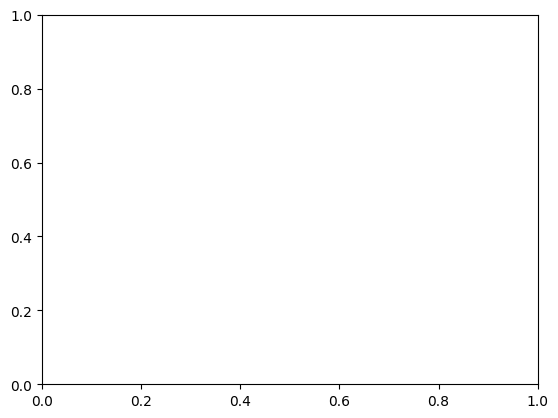

In [84]:

plt.plot(k_range, grid.cv_results_['mean_test_score'])
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated Accuracy')
plt.show()
